In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

# Normal distribution

#### Parameters for the inputs

In [2]:
mean_1 = 0
mean_2 = 0
sigma_1 = 1
sigma_2 = 3
rho = 0

#### The resulting output

In [3]:
mean_Y = mean_1 + mean_2
sigma_Y = np.sqrt(sigma_1**2 + 2*rho*sigma_1*sigma_2 + sigma_2**2)

#### Function to compute the conditional elements

In [4]:
def mean_1_given_2(x2, m_1, m_2, s_1, s_2, rho):
    return m_1 + (rho*s_1*(x2-m_2))/s_2

def mean_2_given_1(x1, m_1, m_2, s_1, s_2, rho):
    return m_2 + (rho*s_2*(x1-m_1))/s_1

def s_1_given_2(s_1, rho):
    return s_1*np.sqrt(1-rho**2)

def s_2_given_1(s_2, rho):
    return s_2*np.sqrt(1-rho**2)

#### Compute the quantiles

In [5]:
def quantile_Y(alpha, m_Y, s_Y):
    return m_Y + s_Y*ss.norm.ppf(alpha)

def quantile_Y_given_1(alpha, x1, m_1, m_2, s_1, s_2, rho):
    res = (mean_2_given_1(x1, m_1, m_2, s_1, s_2, rho))[:,np.newaxis] + \
    (s_2_given_1(s_2, rho)*ss.norm.ppf(alpha))[np.newaxis,:] + x1[:,np.newaxis]
    return res 

def quantile_Y_given_2(alpha, x2, m_1, m_2, s_1, s_2, rho):
    res = (mean_1_given_2(x2, m_1, m_2, s_1, s_2, rho))[:,np.newaxis] +  \
    (s_1_given_2(s_1, rho)*ss.norm.ppf(alpha))[np.newaxis,:] + x2[:,np.newaxis]
    return res

#### Compute the truncated expectation

In [6]:
def truncated_expectation(alpha, m_Y, s_Y):
    res = m_Y*alpha - s_Y*ss.norm.pdf(ss.norm.ppf(alpha))
    return res

def truncated_expectation_Y_given_1(alpha, x1, m_1, m_2, s_1, s_2, rho):
    res = alpha[np.newaxis,:]*x1[:,np.newaxis] + \
    (mean_2_given_1(x1, m_1, m_2, s_1, s_2, rho))[:,np.newaxis]*alpha[np.newaxis,:] - \
    (s_2_given_1(s_2, rho)*ss.norm.pdf(ss.norm.ppf(alpha)))[np.newaxis,:]
    return res

def truncated_expectation_Y_given_2(alpha, x2, m_1, m_2, s_1, s_2, rho):
    res = alpha[np.newaxis,:]*x2[:,np.newaxis] + \
    (mean_1_given_2(x2, m_1, m_2, s_1, s_2, rho))[:,np.newaxis]*alpha[np.newaxis,:] - \
    (s_1_given_2(s_1, rho)*ss.norm.pdf(ss.norm.ppf(alpha)))[np.newaxis,:]
    return res 

#### Compute the QOSA indices

In [7]:
def qosa_indices(s_1, s_2, s_Y, rho):
    return 1 - (s_2*np.sqrt(1-rho**2))/s_Y, 1 - (s_1*np.sqrt(1-rho**2))/s_Y

In [8]:
alpha = np.array([0.1, 0.3, 0.7, 0.9])
q_Y = quantile_Y(alpha, mean_Y, sigma_Y)
t_EY = truncated_expectation(alpha, mean_Y, sigma_Y)
QOSA_indices = qosa_indices(sigma_1, sigma_2, sigma_Y, rho)

## Test on the two variables

In [11]:
n_sample = 10**7
X1_values = ss.norm.rvs(size=n_sample, loc=mean_1, scale=sigma_1, random_state=None)
q_Y_X1 = quantile_Y_given_1(alpha, X1_values, mean_1, mean_2, sigma_1, sigma_2, rho)
t_EY_X1 = truncated_expectation_Y_given_1(alpha, X1_values, mean_1, mean_2, sigma_1, sigma_2, rho)

In [12]:
n_sample = 10**7
X2_values = ss.norm.rvs(size=n_sample, loc=mean_2, scale=sigma_2, random_state=None)
q_Y_X2 = quantile_Y_given_2(alpha, X2_values, mean_1, mean_2, sigma_1, sigma_2, rho)
t_EY_X2 = truncated_expectation_Y_given_2(alpha, X2_values, mean_1, mean_2, sigma_1, sigma_2, rho)

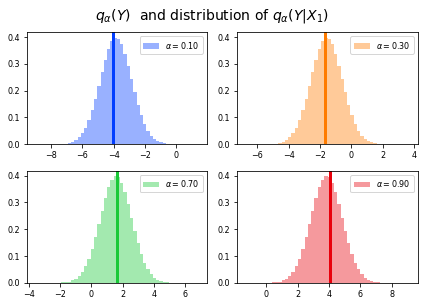

In [13]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(q_Y_X1[:,k], 
                     ax=axes[i,j], 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes[i,j].axvline(x=q_Y[k], color=colors[k], linewidth=3)
        axes[i,j].tick_params(axis = 'both', labelsize = 8)
        axes[i,j].legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ q_{\alpha}(Y)$ '+' and distribution of '+r'$q_{\alpha}(Y | X_1) $', y=1.05, fontsize=14)
fig.tight_layout()

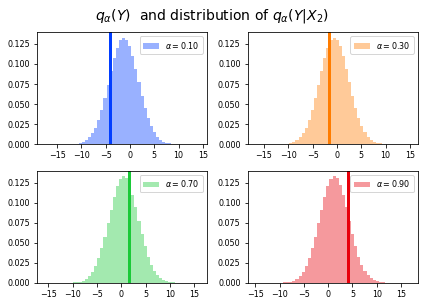

In [14]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(q_Y_X2[:,k], 
                     ax=axes[i,j], 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes[i,j].axvline(x=q_Y[k], color=colors[k], linewidth=3)
        axes[i,j].tick_params(axis = 'both', labelsize = 8)
        axes[i,j].legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ q_{\alpha}(Y)$ '+' and distribution of '+r'$q_{\alpha}(Y | X_2) $', y=1.05, fontsize=14)
fig.tight_layout()

In [15]:
q_Y

array([-4.05262189, -1.65830003,  1.65830003,  4.05262189])

In [16]:
1 - (q_Y_X1.mean(axis=0) - mean_Y)/(q_Y - mean_Y)

array([0.05124378, 0.0511385 , 0.0514949 , 0.05138962])

In [17]:
1 - (q_Y_X2.mean(axis=0) - mean_Y)/(q_Y - mean_Y)

array([0.68407563, 0.68451369, 0.68303078, 0.68346884])

In [18]:
QOSA_indices

(0.05131670194948623, 0.683772233983162)

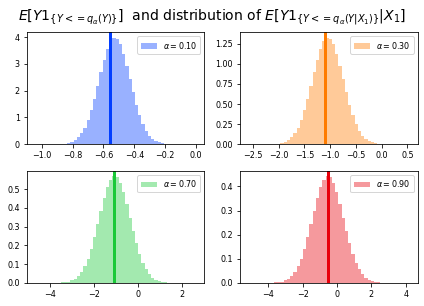

In [19]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(t_EY_X1[:,k], 
                     ax=axes[i,j], 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes[i,j].axvline(x=t_EY[k], color=colors[k], linewidth=3)
        axes[i,j].tick_params(axis = 'both', labelsize = 8)
        axes[i,j].legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y) \} }] $ ' +
             ' and distribution of ' + 
             r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y | X_{1}) \} } | X_1 ] $', y=1.05, fontsize=14)
fig.tight_layout()

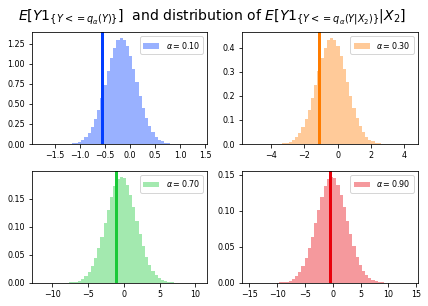

In [20]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(t_EY_X2[:,k], 
                     ax=axes[i,j], 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes[i,j].axvline(x=t_EY[k], color=colors[k], linewidth=3)
        axes[i,j].tick_params(axis = 'both', labelsize = 8)
        axes[i,j].legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y) \} }] $ ' +
             ' and distribution of ' + 
             r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y | X_{2}) \} } | X_2 ] $', y=1.05, fontsize=14)
fig.tight_layout()

In [21]:
t_EY

array([-0.55497445, -1.09950059, -1.09950059, -0.55497445])

In [22]:
q_Y_X1.mean(axis=0) - mean_Y

array([-3.84495021, -1.57349705,  1.57290603,  3.84435919])

In [23]:
alpha*mean_Y - t_EY_X1.mean(axis=0)

array([0.52652455, 1.0431665 , 1.0432847 , 0.52676095])

In [24]:
(q_Y_X1.mean(axis=0) - mean_Y)/(q_Y - mean_Y)

array([0.94875622, 0.9488615 , 0.9485051 , 0.94861038])

In [25]:
(alpha*mean_Y - t_EY_X1.mean(axis=0))/(alpha*mean_Y - t_EY)

array([0.94873655, 0.94876393, 0.94887144, 0.94916253])

In [26]:
1 - (alpha*mean_Y - t_EY_X1.mean(axis=0))/(alpha*mean_Y - t_EY)

array([0.05126345, 0.05123607, 0.05112856, 0.05083747])

In [27]:
1 - (alpha*mean_Y -t_EY_X2.mean(axis=0))/(alpha*mean_Y - t_EY)

array([0.68399379, 0.68410772, 0.68455503, 0.6857662 ])

In [28]:
QOSA_indices

(0.05131670194948623, 0.683772233983162)

In [ ]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(q_Y_X1[:,k], 
                     ax=axes, 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axvline(x=q_Y[k], color=colors[k], linewidth=3)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

axes.tick_params(axis = 'both', labelsize = 8)
fig.suptitle(r'$ q_{\alpha}(Y)$ '+' and distribution of '+r'$q_{\alpha}(Y | X_1) $', y=1.05, fontsize=14)
fig.tight_layout()

In [ ]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(q_Y_X2[:,k], 
                     ax=axes, 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axvline(x=q_Y[k], color=colors[k], linewidth=3)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

axes.tick_params(axis = 'both', labelsize = 8)
fig.suptitle(r'$ q_{\alpha}(Y)$ '+' and distribution of '+r'$q_{\alpha}(Y | X_2) $', y=1.05, fontsize=14)
fig.tight_layout()

In [ ]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(t_EY_X1[:,k], 
                     ax=axes, 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axvline(x=t_EY[k], color=colors[k], linewidth=3)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

axes.tick_params(axis = 'both', labelsize = 8)
fig.suptitle(r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y) \} }] $ ' +
             ' and distribution of ' + 
             r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y | X_{1}) \} } | X_1 ] $', y=1.05, fontsize=14)
fig.tight_layout()

In [ ]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        sns.distplot(t_EY_X2[:,k], 
                     ax=axes, 
                     hist=True, 
                     kde=False,
                     color=colors[k],
                     norm_hist=True, 
                     label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axvline(x=t_EY[k], color=colors[k], linewidth=3)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

axes.tick_params(axis = 'both', labelsize = 8)
fig.suptitle(r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y) \} }] $ ' +
             ' and distribution of ' + 
             r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y | X_{2}) \} } | X_2 ] $', y=1.05, fontsize=14)
fig.tight_layout()

In [ ]:
x1_values = np.arange(-10,10)
q_Y_x1 = quantile_Y_given_1(alpha, x1_values, mean_1, mean_2, sigma_1, sigma_2, rho)
t_EY_x1 = truncated_expectation_Y_given_1(alpha, x1_values, mean_1, mean_2, sigma_1, sigma_2, rho)

In [ ]:
x2_values = np.arange(-10,10)
q_Y_x2 = quantile_Y_given_2(alpha, x2_values, mean_1, mean_2, sigma_1, sigma_2, rho)
t_EY_x2 = truncated_expectation_Y_given_2(alpha, x2_values, mean_1, mean_2, sigma_1, sigma_2, rho)

In [ ]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        axes.plot(x1_values, q_Y_x1[:,k], color=colors[k], label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axhline(y=q_Y[k], color=colors[k], linestyle='dashed')
        axes.tick_params(axis = 'both', labelsize = 8)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ q_{\alpha}(Y)$ '+' and values of '+r'$q_{\alpha}(Y | X_1) $', y=1.05, fontsize=14)
fig.tight_layout()

In [ ]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        axes.plot(x2_values, q_Y_x2[:,k], color=colors[k], label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axhline(y=q_Y[k], color=colors[k], linestyle='dashed')
        axes.tick_params(axis = 'both', labelsize = 8)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ q_{\alpha}(Y)$ '+' and values of '+r'$q_{\alpha}(Y | X_2) $', y=1.05, fontsize=14)
fig.tight_layout()

In [ ]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        axes.plot(x1_values, t_EY_x1[:,k], color=colors[k], label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axhline(y=t_EY[k], color=colors[k], linestyle='dashed')
        axes.tick_params(axis = 'both', labelsize = 8)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y) \} }] $ ' +
             ' and values of ' + 
             r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y | X_{1}) \} } | X_1 ] $', y=1.05, fontsize=14)
fig.tight_layout()

In [ ]:
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

k = 0
for i in range(2):
    for j in range(2):
        axes.plot(x2_values, t_EY_x2[:,k], color=colors[k], label=r'$ \alpha = %.2f $' %(alpha[k],))
        axes.axhline(y=t_EY[k], color=colors[k], linestyle='dashed')
        axes.tick_params(axis = 'both', labelsize = 8)
        axes.legend(loc='best',frameon=True, fontsize = 8)
        k += 1

fig.suptitle(r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y) \} }] $ ' +
             ' and values of ' + 
             r'$ E[Y 1_{ \{ Y <= q_{\alpha} (Y | X_{2}) \} } | X_2 ] $', y=1.05, fontsize=14)
fig.tight_layout()

In [89]:
import openturns as ot
import numpy as np

from shapley.model import ProbabilisticModel

def pres_func(X):
    """Linear model function
    """
    X = np.asarray(X)
    dim = X.shape[1]
    coef = np.ones(dim)
    return X.dot(coef)

dim = 2
margins = [ot.Normal(0, 1.5), ot.Normal(100, 1)]
copula = ot.NormalCopula(dim)
input_distribution = ot.ComposedDistribution(margins, copula)
model = ProbabilisticModel(model_func = pres_func, input_distribution = input_distribution)

from shapley import SobolIndices

n_sample = 10**5

sobol = SobolIndices(model.input_distribution)
sobol.build_sample(model=model, n_sample=n_sample)
sobol_results = sobol.compute_indices(n_boot=1)

In [90]:
sobol_results.first_indices

array([[0.35273939],
       [0.63907417]])

In [91]:
sobol_results.total_indices

array([[0.31931082],
       [0.60483111]])